In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

try:
    data = pd.read_csv("extrato_bancario_partido_2022/extrato_bancario_partido_2022.csv", delimiter=';', encoding='latin1')
except UnicodeDecodeError:
    try:
        data = pd.read_csv("extrato_bancario_partido_2022/extrato_bancario_partido_2022.csv", delimiter=';', encoding='iso-8859-1')
    except UnicodeDecodeError:
        data = pd.read_csv("extrato_bancario_partido_2022/extrato_bancario_partido_2022.csv", delimiter=';', encoding='cp1252')

print(data.head())

print(data.info())

print(data.isnull().sum())

for column in data.columns:
    print(data.columns)



/tmp/ipykernel_1079168/2552230834.py:2: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("extrato_bancario_partido_2022/extrato_bancario_partido_2022.csv", delimiter=';', encoding='latin1')


   DT_GERACAO HH_GERACAO  AA_REFERENCIA  NR_CNPJ_PRESTADOR_CONTA SG_PARTIDO  \
0  05/09/2024   00:05:07           2022           15692326000102     AVANTE   
1  05/09/2024   00:05:07           2022           15692326000102     AVANTE   
2  05/09/2024   00:05:07           2022           15692326000102     AVANTE   
3  05/09/2024   00:05:07           2022           15692326000102     AVANTE   
4  05/09/2024   00:05:07           2022           15692326000102     AVANTE   

   NM_ESFERA  TP_PESSOA DS_LANCAMENTO DT_LANCAMENTO NR_DOCUMENTO  ...  \
0  Municipal         -1    PAG BOLETO    03/08/2022       425490  ...   
1  Municipal         -1      PAG AGUA    09/12/2022       460736  ...   
2  Municipal         -1    DB CEST PJ    13/12/2022       112022  ...   
3  Municipal          1      CRED TED    13/05/2022           33  ...   
4  Municipal         -1     SALDO DIA    12/04/2022            0  ...   

  VR_LANCAMENTO  CD_BANCO_CONTRAPARTE NM_BANCO_CONTRAPARTE  \
0        135,77         

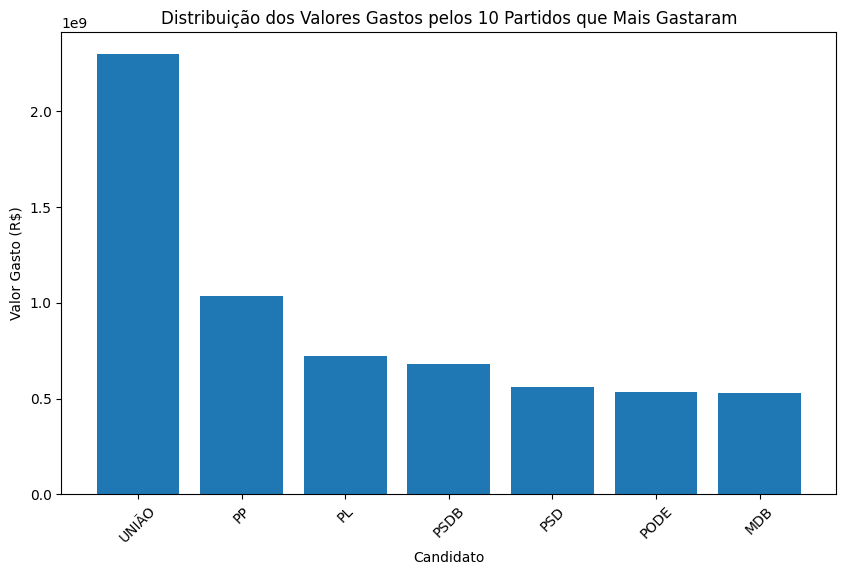

In [3]:
data['VR_LANCAMENTO'] = data['VR_LANCAMENTO'].astype(str).str.replace(',', '.').astype(float)

# Agrupando os gastos por candidato
gastos_por_candidato = data.groupby(['NR_CPF_CNPJ_CONTRAPARTE', 'SG_PARTIDO'])['VR_LANCAMENTO'].sum()

top_10_gastadores = gastos_por_candidato.nlargest(10).reset_index()

# Plotando o gráfico
plt.figure(figsize=(10, 6))
plt.bar(top_10_gastadores['SG_PARTIDO'], top_10_gastadores['VR_LANCAMENTO'])
plt.title('Distribuição dos Valores Gastos pelos 10 Partidos que Mais Gastaram')
plt.xlabel('Candidato')
plt.ylabel('Valor Gasto (R$)')

plt.xticks(rotation=45)
plt.show()

In [4]:
estatisticas_por_partido = data.groupby('SG_PARTIDO')['VR_LANCAMENTO'].agg(['mean', 'std','sum'])
print(estatisticas_por_partido)




                       mean           std           sum
SG_PARTIDO                                             
#NULO#          1644.216492  4.432918e+04  8.540060e+06
AGIR           34308.153748  6.418342e+05  1.457410e+08
AVANTE         44695.393388  9.380082e+05  6.098686e+08
CIDADANIA      36604.750951  9.694526e+05  6.252458e+08
DC              9210.012146  1.762980e+05  6.528057e+07
DEM            12613.788628  5.001152e+05  1.304266e+08
MDB            32078.100579  2.024273e+06  2.315205e+09
MOBILIZA       22346.234245  4.730906e+05  8.596596e+07
NOVO           18694.276267  1.443954e+05  3.222332e+08
PATRIOTA       42906.110054  1.167938e+06  7.107397e+08
PC do B        16262.700779  7.245437e+05  4.318235e+08
PCB             2341.735956  5.839897e+04  7.584883e+06
PCO            14115.586896  1.409991e+05  7.184834e+06
PDT            32029.834973  1.437479e+06  1.708792e+09
PHS              212.905593  5.186064e+03  2.048152e+05
PL             56182.116231  2.084401e+06  2.024

In [ ]:
data['VR_LANCAMENTO_NORMALIZADO'] = data.groupby('SG_PARTIDO')['VR_LANCAMENTO'].transform(lambda x: (x - x.mean()) / x.std())
print(data[['SG_PARTIDO', 'VR_LANCAMENTO', 'VR_LANCAMENTO_NORMALIZADO']].head())
# Acho que vamos fazer a normalizacao depois de ter somado os gastos por partido

  SG_PARTIDO  VR_LANCAMENTO  VR_LANCAMENTO_NORMALIZADO
0     AVANTE         135.77                  -0.047505
1     AVANTE         246.43                  -0.047387
2     AVANTE           4.01                  -0.047645
3     AVANTE         500.00                  -0.047116
4     AVANTE           0.00                  -0.047649


In [6]:

print("\nVerificação de valores ausentes por coluna:")

missing_values = data.isna().sum()
print(missing_values[missing_values > 0])


Verificação de valores ausentes por coluna:
NR_CONTA_CONTRAPARTE    155
NM_CONTRAPARTE          155
dtype: int64


In [7]:
columns_to_remove = ["NR_CPF_CNPJ_CONTRAPARTE", "NM_CONTRAPARTE", "CD_FONTE_RECURSO", "NM_FONTE_RECURSO", "DS_DETALHE_FONTE_RECURSO", "CD_BANCO_CONTRAPARTE", "NM_BANCO_CONTRAPARTE", "NR_AGENCIA_CONTRAPARTE", "NR_CONTA_CONTRAPARTE", "NM_ESFERA", "TP_PESSOA", "DS_LANCAMENTO", "DT_LANCAMENTO", "NR_DOCUMENTO", "TP_LANCAMENTO", "TP_OPERACAO", "NM_OPERACAO", "CD_BANCO", "NM_BANCO", "NR_AGENCIA", "NR_CONTA", "TP_CONTA", "DT_GERACAO", "HH_GERACAO", "AA_REFERENCIA", "NR_CNPJ_PRESTADOR_CONTA"]
data_cleaned = data.drop(columns=columns_to_remove)

data_cleaned = data_cleaned.dropna()

data_cleaned.to_csv('data_cleaned_extrato-bancario.csv', index=False)
